In [2]:
# Pandas library laden en head
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

#Config-bestand laden als dictionary zodat buiten de functie alle opties
#als key+waarde behandeld kunnen worden
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()

df = config["weight_file"]
df = pd.read_csv("updated_Data_Results(Jean).csv", sep=';', decimal=',')
richarddf = pd.read_csv("updated_Data_Results(Richard).csv", sep=';', decimal=',')
df.head()

,Date\Parameters,Day,Intake Dose,Test Type,Weight (Kg),BMI (kg/m2),RMI (kcal),Fat Visceral (%),Body Fat (%),Muscle (%),...,Unnamed: 17,Unnamed: 18,Glucose(mmol/l),Unnamed: 20,Unnamed: 21,Micro_Biome,Unnamed: 23,Unnamed: 24,Additional remarks,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Average,1.0,2.0,Average,1.0,2.0,Average,NaN,NaN
1,28-11-2024,Thursday,half-Dose (10days),BaseLine-Test,79.4,22.5,1774.0,3.0,"16,10%",41.7,...,NaN,NaN,3.8,3.8,"3,8",NaN,NaN,NaN,Eaten breakfast (7:15 AM) before glucose measu...,NaN
2,29-11-2024,Friday,half-Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30-11-2024,Saturday,half-Dose,NaN,79.1,22.4,1768.0,4.0,"16,7",41.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-12-2024,Sunday,half-Dose,NaN,78.1,22.1,1752.0,4.0,17,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Index verwijderen
blankIndex = [''] * len(df)
df.index = blankIndex

# Ontbrekende waardes (NaN) aanpassen naar lege cellen
#df = df.fillna("")
df.head()

,Date\Parameters,Day,Intake Dose,Test Type,Weight (Kg),BMI (kg/m2),RMI (kcal),Fat Visceral (%),Body Fat (%),Muscle (%),...,Unnamed: 17,Unnamed: 18,Glucose(mmol/l),Unnamed: 20,Unnamed: 21,Micro_Biome,Unnamed: 23,Unnamed: 24,Additional remarks,Unnamed: 26
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Average,1.0,2.0,Average,1.0,2.0,Average,NaN,NaN
,28-11-2024,Thursday,half-Dose (10days),BaseLine-Test,79.4,22.5,1774.0,3.0,"16,10%",41.7,...,NaN,NaN,3.8,3.8,"3,8",NaN,NaN,NaN,Eaten breakfast (7:15 AM) before glucose measu...,NaN
,29-11-2024,Friday,half-Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,30-11-2024,Saturday,half-Dose,NaN,79.1,22.4,1768.0,4.0,"16,7",41.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1-12-2024,Sunday,half-Dose,NaN,78.1,22.1,1752.0,4.0,17,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Dosage = df['Intake Dose']
for item in Dosage:
    if item == "half-Dose (10days)":
        if item == "half-Dose":
            

SyntaxError: incomplete input (2678374087.py, line 5)

In [5]:
startdate = df['Date\Parameters '].iloc[1]
startdate = pd.to_datetime(startdate, format='%d-%m-%Y')
dates = pd.to_datetime((df['Date\Parameters ']), format='%d-%m-%Y')
#print(dates)
df['Days'] = (dates - startdate) / np.timedelta64(1, 'D')
df.head(20)
#df2['Days'] = np.datetime64(df['Date\Parameters '])

,Date\Parameters,Day,Intake Dose,Test Type,Weight (Kg),BMI (kg/m2),RMI (kcal),Fat Visceral (%),Body Fat (%),Muscle (%),...,Unnamed: 18,Glucose(mmol/l),Unnamed: 20,Unnamed: 21,Micro_Biome,Unnamed: 23,Unnamed: 24,Additional remarks,Unnamed: 26,Days
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,1.0,2.0,Average,1.0,2.0,Average,NaN,NaN,NaN
,28-11-2024,Thursday,half-Dose (10days),BaseLine-Test,79.4,22.5,1774.0,3.0,"16,10%",41.7,...,NaN,3.8,3.8,"3,8",NaN,NaN,NaN,Eaten breakfast (7:15 AM) before glucose measu...,NaN,0.0
,29-11-2024,Friday,half-Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
,30-11-2024,Saturday,half-Dose,NaN,79.1,22.4,1768.0,4.0,"16,7",41.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
,1-12-2024,Sunday,half-Dose,NaN,78.1,22.1,1752.0,4.0,17,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
,2-12-2024,Monday,half-Dose,NaN,78.6,22.2,1758.0,4.0,"17,6",40.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
,3-12-2024,Tuesday,half-Dose,NaN,79.3,22.4,1774.0,4.0,"15,2",42.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
,4-12-2024,Wednesday,half-Dose,NaN,79.5,22.5,1776.0,4.0,"15,9",41.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
,5-12-2024,Thursday,half-Dose,NaN,79.7,22.5,1780.0,4.0,"15,7",42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
,6-12-2024,Friday,half-Dose,,79.7,22.5,1779.0,4.0,"15,7",42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [6]:
# Ontbrekende waardes verwijderen en sorteren op basis van naam van dosis
df.dropna(subset=['Weight (Kg)'], inplace=True)

# Nieuw dataframe met alleen vereiste kolommen toevoegen
df2 = pd.DataFrame(columns=['Dose','Date','Weight'])

# Vereiste kolommen maken
df2['Dose'] = df['Intake Dose']
df2['Date'] = df['Date\Parameters ']
df2['Weight'] = df['Weight (Kg)']
df2['BMI'] = df['BMI (kg/m2)']
df2['RMI'] = df['RMI (kcal)']
df2['Fat'] = df['Body Fat (%)']
df2['Muscle'] = df['Muscle (%)']
df2['hr'] = df['Heart rate']
df2['bp (dia)'] = df['Blood Pressure(diastolic) (mmHg)']
df2['bp (sys)'] = df['Blood Pressure(systolic) (mmHg)\n']

# Nieuwe dag kolom maken
startdate = df2['Date'].iloc[0]
startdate = pd.to_datetime(startdate, format='%d-%m-%Y')
dates = pd.to_datetime((df2['Date']), format='%d-%m-%Y')
df2['Days'] = (dates - startdate) / np.timedelta64(1, 'D')

# Categorieën maken voor de data
def my_func(x):
    if x['Days'] <= 10 and x['Days'] > 0:
        return "1st Half Dose"
    if x['Days'] <= 21 and x['Days'] >= 11:
        return "1st Full Dose"
    if x['Days'] <= 42 and x['Days'] >= 22:
        return "2st Half Dose"
    if x['Days'] <= 63 and x['Days'] >= 43:
        return "2st Full Dose"

df2['Dosage Type'] = df2.apply(lambda x: my_func(x), 1)

df2.head(50)

,Dose,Date,Weight,BMI,RMI,Fat,Muscle,hr,bp (dia),bp (sys),Days,Dosage Type
,half-Dose (10days),28-11-2024,79.4,22.5,1774.0,"16,10%",41.7,64.0,84.0,129.0,0.0,None
,half-Dose,30-11-2024,79.1,22.4,1768.0,"16,7",41.7,65.0,89.0,130.0,2.0,1st Half Dose
,half-Dose,1-12-2024,78.1,22.1,1752.0,17,41.1,65.0,87.0,133.0,3.0,1st Half Dose
,half-Dose,2-12-2024,78.6,22.2,1758.0,"17,6",40.8,66.0,80.0,131.0,4.0,1st Half Dose
,half-Dose,3-12-2024,79.3,22.4,1774.0,"15,2",42.3,57.0,81.0,121.0,5.0,1st Half Dose
,half-Dose,4-12-2024,79.5,22.5,1776.0,"15,9",41.9,57.0,82.0,127.0,6.0,1st Half Dose
,half-Dose,5-12-2024,79.7,22.5,1780.0,"15,7",42.0,58.0,82.0,128.0,7.0,1st Half Dose
,half-Dose,6-12-2024,79.7,22.5,1779.0,"15,7",42.0,60.0,78.0,119.0,8.0,1st Half Dose
,half-Dose,7-12-2024,78.8,22.3,1764.0,"16,4",41.5,72.0,80.0,126.0,9.0,1st Half Dose
,Break,8-12-2024,78.4,22.2,1757.0,"16,8",41.3,62.0,81.0,116.0,10.0,1st Half Dose


In [7]:
df2 = df2.dropna()
df2.head()

,Dose,Date,Weight,BMI,RMI,Fat,Muscle,hr,bp (dia),bp (sys),Days,Dosage Type
,half-Dose,30-11-2024,79.1,22.4,1768.0,"16,7",41.7,65.0,89.0,130.0,2.0,1st Half Dose
,half-Dose,1-12-2024,78.1,22.1,1752.0,17,41.1,65.0,87.0,133.0,3.0,1st Half Dose
,half-Dose,2-12-2024,78.6,22.2,1758.0,"17,6",40.8,66.0,80.0,131.0,4.0,1st Half Dose
,half-Dose,3-12-2024,79.3,22.4,1774.0,"15,2",42.3,57.0,81.0,121.0,5.0,1st Half Dose
,half-Dose,4-12-2024,79.5,22.5,1776.0,"15,9",41.9,57.0,82.0,127.0,6.0,1st Half Dose


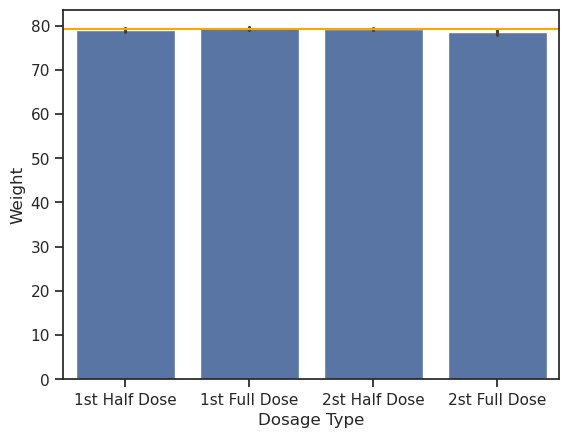

In [12]:
parameter = "Weight"
sns.barplot(df2, x="Dosage Type", y="Weight")
# Gemiddelde berekenen voor verticale lijn
average = st.mean(df2[parameter])
plt.axhline(average, color="orange")

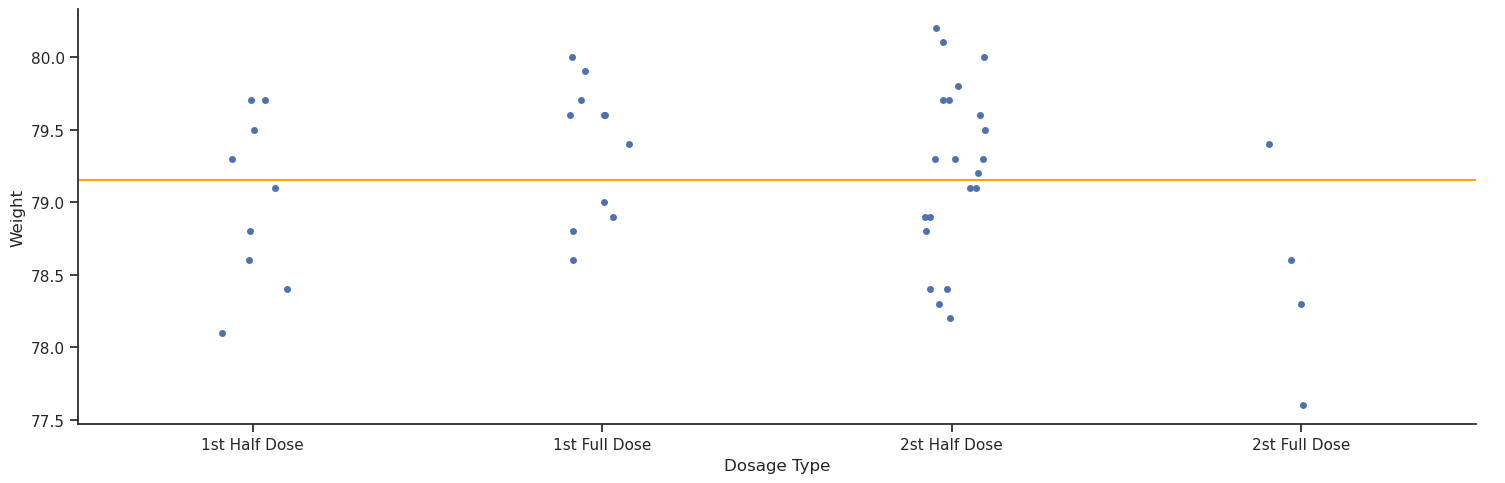

In [13]:
sns.set_theme(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
fig = sns.catplot(x="Dosage Type", y="Weight", data=df2, height=5, aspect=3)
# Gemiddelde berekenen voor verticale lijn
average = st.mean(df2[parameter])
plt.axhline(average, color="orange")
fig.savefig("scatter.png")
#fig.refline(y=80, color='red')

/tmp/ipykernel_200941/3532866165.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=40, ha="right")


[Text(0, 0, '1st Half Dose'),
 Text(1, 0, '1st Full Dose'),
 Text(2, 0, '2st Half Dose'),
 Text(3, 0, '2st Full Dose')]

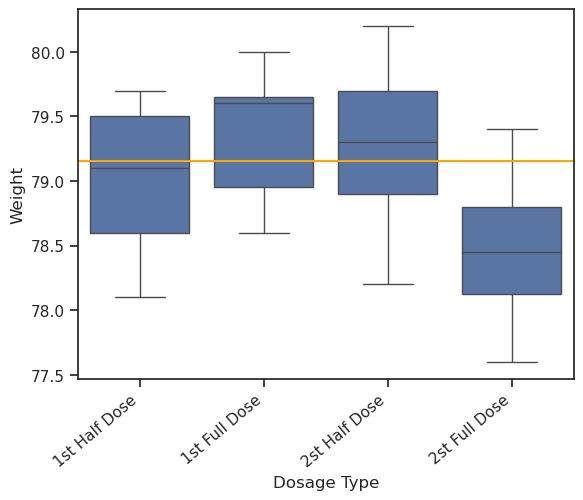

In [17]:
parameter = 'Weight'
box_plot = sns.boxplot(data=df2, x="Dosage Type", y="Weight", width=0.8)

# Gemiddelde berekenen voor verticale lijn
average = st.mean(df2[parameter])
plt.axhline(average, color="orange")

medians = df2.groupby(['Dosage Type'])['Weight'].mean()
vertical_offset = df2['Weight'].mean() * 0.05 # offset from median for display

box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=40, ha="right")

#box_plot.tight_layout()

#for xtick in box_plot.get_xticks():
#    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#            horizontalalignment='center',size='x-small',color='w',weight='semibold'
#medians

In [19]:
parameter = 'Weight'
dose_types = df2['Dosage Type'].unique()
max_values = df2.groupby(['Dosage Type'], sort=False)[parameter].max()
min_values = df2.groupby(['Dosage Type'], sort=False)[parameter].min()
avg_values = df2.groupby(['Dosage Type'], sort=False)[parameter].mean()
std_values = df2.groupby(['Dosage Type'], sort=False)[parameter].std()
summary_dict = {'Dose': dose_types, 'Average': avg_values, 'Standard Deviation': std_values, 'Minimum': min_values, 'Maximum': max_values}
summary = result = pd.DataFrame(summary_dict)
print(summary)

                        Dose    Average  Standard Deviation  Minimum  Maximum
Dosage Type                                                                  
1st Half Dose  1st Half Dose  79.022222            0.580469     78.1     79.7
1st Full Dose  1st Full Dose  79.372727            0.471362     78.6     80.0
2st Half Dose  2st Half Dose  79.228571            0.592573     78.2     80.2
2st Full Dose  2st Full Dose  78.475000            0.745542     77.6     79.4


/tmp/ipykernel_200941/38915265.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


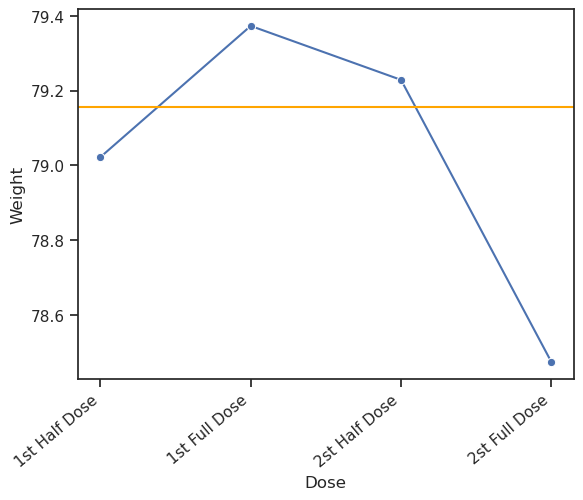

In [20]:
ax = sns.lineplot(data=summary, x="Dosage Type", y="Average", marker="o")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Dose', ylabel=parameter)
average = st.mean(df2[parameter])
ax.axhline(average, color="orange")

In [12]:
weight = df2['Weight']
BMI = df2['BMI'].astype(float)
muscle = df2['Muscle']
average_weight = statistics.mean(weight)
average_bmi = statistics.mean(BMI)
average_muscle = statistics.mean(muscle)
print(f"The average weight is: {average_weight:.1f} kg")
print(f"The average BMI is: {average_bmi:.1f} kg/m2")
print(f"The average muscle percentage is: {average_muscle:.1f} %")

The average weight is: 79.2 kg
The average BMI is: 22.4 kg/m2
The average muscle percentage is: 41.6 %
